In [1]:
import network as net
from mnist_loader import load_mnist_data, load_test_data, export_data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split, KFold

In [2]:
train, valid, test = load_mnist_data()

In [11]:
EPOCHS = 200
RS = None

start = time.time()
netw = net.Network([784, 30, 10], random_state=RS)
result = netw.SGD(train, .1, EPOCHS, 10, 5., n_epoch=10, evaluation_data=test,
                                    monitor_evaluation_accuracy=True,
                                    monitor_evaluation_cost=True, 
                                    monitor_training_accuracy=False, 
                                    monitor_training_cost=False)
print("%s seconds" % (time.time()-start))

# netw.SGD(train, 2.714, 30, 30)
# export_data("last_ver.csv", netw.predict(test))

Epoch 1 training complete
 evaluation data
    | Accuracy: 91.514286 
    | Cost:     0.679601

0.9151428571428571 0
Epoch 2 training complete
 evaluation data
    | Accuracy: 92.985714 
    | Cost:     0.620125

0.9298571428571428 0.9151428571428571
Epoch 3 training complete
 evaluation data
    | Accuracy: 93.614286 
    | Cost:     0.609820

0.9361428571428572 0.9298571428571428
Epoch 4 training complete
 evaluation data
    | Accuracy: 93.892857 
    | Cost:     0.609466

0.9389285714285714 0.9361428571428572
Epoch 5 training complete
 evaluation data
    | Accuracy: 94.328571 
    | Cost:     0.603562

0.9432857142857143 0.9389285714285714
Epoch 6 training complete
 evaluation data
    | Accuracy: 94.514286 
    | Cost:     0.606978

0.9451428571428572 0.9432857142857143
Epoch 7 training complete
 evaluation data
    | Accuracy: 94.600000 
    | Cost:     0.617020

0.946 0.9451428571428572
Epoch 8 training complete
 evaluation data
    | Accuracy: 94.421429 
    | Cost:     0.6296

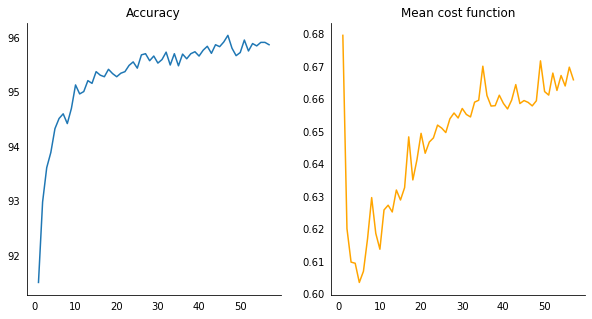

In [12]:
# acc, cf, acc_t, cf_t = result
visualisation(*result)

In [5]:
def visualisation(acc, cf, figsize=(10, 5)):
    color_cf = None
    if type(acc[0]) != list:
        acc = [acc]
        cf = [cf]
        color_cf = "orange" 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(figsize)
    epochs = len(acc[0])
    for acc_i, cf_i in zip(acc, cf):
        ax1.plot(range(1, epochs+1), np.array(acc_i)*100)
        ax2.plot(range(1, epochs+1), cf_i, color=color_cf)

    for ax in (ax1, ax2):
        ax.spines["right"].set_visible(False)    
        ax.spines["top"].set_visible(False)
        ax.tick_params(bottom=False, left=False)
        
    ax1.set_title("Accuracy")
    ax2.set_title("Mean cost function")

    plt.show()